## Australian Health Services (1977-1978) - Analysis & post-estimation diagnostic
### Christine Berry 

In [2]:
pip install stargazer

Note: you may need to restart the kernel to use updated packages.


In [1]:
# Loading the Library 

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import statsmodels.api as sm
import statsmodels.formula.api as smf

from statsmodels.iolib.summary2 import summary_col

from patsy import dmatrix
import seaborn as sns
# import seaborn.objects as so

import scipy.stats as stats

In [15]:
# Read data into notebook 
drvisits = pd.read_csv('./doctorvisits.csv')

np.array([a for a in dir(drvisits) if not a.startswith("_")])

array(['T', 'abs', 'add', 'add_prefix', 'add_suffix', 'age', 'agg',
       'aggregate', 'align', 'all', 'any', 'apply', 'applymap', 'asfreq',
       'asof', 'assign', 'astype', 'at', 'at_time', 'attrs', 'axes',
       'backfill', 'between_time', 'bfill', 'bool', 'boxplot', 'clip',
       'columns', 'combine', 'combine_first', 'compare', 'convert_dtypes',
       'copy', 'corr', 'corrwith', 'count', 'cov', 'cummax', 'cummin',
       'cumprod', 'cumsum', 'describe', 'diff', 'div', 'divide', 'dot',
       'drop', 'drop_duplicates', 'droplevel', 'dropna', 'dtypes',
       'duplicated', 'empty', 'eq', 'equals', 'eval', 'ewm', 'expanding',
       'explode', 'ffill', 'fillna', 'filter', 'first',
       'first_valid_index', 'flags', 'floordiv', 'freepoor', 'freerepat',
       'from_dict', 'from_records', 'ge', 'gender', 'get', 'groupby',
       'gt', 'head', 'health', 'hist', 'iat', 'idxmax', 'idxmin',
       'illness', 'iloc', 'income', 'index', 'infer_objects', 'info',
       'insert', 'inter

### Part 1: Pre-Processing the Data

In [16]:
# Getting basic information about the dtype

drvisits.info()

    # int = integer variables
    # float = continuous variable
    # object = needs to be converted to categorical 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5190 entries, 0 to 5189
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5190 non-null   int64  
 1   visits      5190 non-null   int64  
 2   gender      5190 non-null   object 
 3   age         5190 non-null   float64
 4   income      5190 non-null   float64
 5   illness     5190 non-null   int64  
 6   reduced     5190 non-null   int64  
 7   health      5190 non-null   int64  
 8   private     5190 non-null   object 
 9   freepoor    5190 non-null   object 
 10  freerepat   5190 non-null   object 
 11  nchronic    5190 non-null   object 
 12  lchronic    5190 non-null   object 
dtypes: float64(2), int64(5), object(6)
memory usage: 527.2+ KB


drvisits data set has 51940 observations and 12 variables. 
6 of which are objects (gender, private, freepoor, freerepat, nchronic, lchronic).

In [18]:
# Check to see if there are any NAs

drvisits.isna().sum()

    # No Na's! 

Unnamed: 0    0
visits        0
gender        0
age           0
income        0
illness       0
reduced       0
health        0
private       0
freepoor      0
freerepat     0
nchronic      0
lchronic      0
dtype: int64

In [17]:
# Look at the first 10 rows 

drvisits.head(10)

,Unnamed: 0,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
0,1,1,female,0.19,0.55,1,4,1,yes,no,no,no,no
1,2,1,female,0.19,0.45,1,2,1,yes,no,no,no,no
2,3,1,male,0.19,0.90,3,0,0,no,no,no,no,no
3,4,1,male,0.19,0.15,1,0,0,no,no,no,no,no
4,5,1,male,0.19,0.45,2,5,1,no,no,no,yes,no
5,6,1,female,0.19,0.35,5,1,9,no,no,no,yes,no
6,7,1,female,0.19,0.55,4,0,2,no,no,no,no,no
7,8,1,female,0.19,0.15,3,0,6,no,no,no,no,no
8,9,1,female,0.19,0.65,2,0,5,yes,no,no,no,no
9,10,1,male,0.19,0.15,1,0,0,yes,no,no,no,no


The first 10 rows indicate that the following variables are:

Integer values = "visits", "illness", "reduced", and "health" 

object values =  "gender", "private", "freepoor", "freerepat", "nchronic", and "lchronic"

Float values =  "age" and "income" contain float values. 

In [22]:
# Making a copy of the data set so i don't mess up the original one 

drv = drvisits.copy()

In [23]:
# Convert all variables with 'object' data types to 'category' using a for loop:

for v in drv.columns.values:
    if drv[v].dtype == 'object':
        drv[v] =drv[v].astype('category')

In [30]:
# Viewing data set to double check that it converted 

drv.info()       
        # All variables with 'object' dtypes did convertto 'category' dtypes
        # slay 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5190 entries, 0 to 5189
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  5190 non-null   int64   
 1   visits      5190 non-null   int64   
 2   gender      5190 non-null   category
 3   age         5190 non-null   float64 
 4   income      5190 non-null   float64 
 5   illness     5190 non-null   int64   
 6   reduced     5190 non-null   int64   
 7   health      5190 non-null   int64   
 8   private     5190 non-null   category
 9   freepoor    5190 non-null   category
 10  freerepat   5190 non-null   category
 11  nchronic    5190 non-null   category
 12  lchronic    5190 non-null   category
dtypes: category(6), float64(2), int64(5)
memory usage: 315.1 KB


In [25]:
# Figure out the unique values of the categorical variables
# & save them in a dictionary: 

catDict = {}
for v in drv.columns:
    if drv[v].dtype == 'category':
        catDict[v] = drv[v].unique().tolist()

catDict

{'gender': ['female', 'male'],
 'private': ['yes', 'no'],
 'freepoor': ['no', 'yes'],
 'freerepat': ['no', 'yes'],
 'nchronic': ['no', 'yes'],
 'lchronic': ['no', 'yes']}

In [26]:
# Using the dictionary, I change subcategory ordering
# to make it easier when I do interpretations: 

catDict = {'gender': ['male', 'female'],
       'private': ['no', 'yes'],
       'freepoor': ['no', 'yes'],
       'freerepat': ['no', 'yes'],
       'nchronic': ['no', 'yes'],
       'lchronic': ['no', 'yes']}

catDict

{'gender': ['male', 'female'],
 'private': ['no', 'yes'],
 'freepoor': ['no', 'yes'],
 'freerepat': ['no', 'yes'],
 'nchronic': ['no', 'yes'],
 'lchronic': ['no', 'yes']}

In [28]:
# Change the age variable - so it's a whole number and not a decimal

drv['age'] = drv['age']*100

### Part 2: Provide a thorough descriptive analysis of the data with various tables and plots:¶

In [31]:
# Running a little description analysis of the integer & float variables 

drv.describe()

,Unnamed: 0,visits,age,income,illness,reduced,health
count,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000
mean,2595.500000,0.301734,4063.853565,0.583160,1.431985,0.861850,1.217534
std,1498.368279,0.798134,2047.818167,0.368907,1.384152,2.887628,2.124266
min,1.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000
25%,1298.250000,0.000000,2200.000000,0.250000,0.000000,0.000000,0.000000
50%,2595.500000,0.000000,3200.000000,0.550000,1.000000,0.000000,0.000000
75%,3892.750000,0.000000,6200.000000,0.900000,2.000000,0.000000,2.000000
max,5190.000000,9.000000,7200.000000,1.500000,5.000000,14.000000,12.000000


The description above tells me a few things about the variables: 

*Visits*: Most respondents did not visit the doctor in the two week period (mean of 0.30 visits); but the max # of visits in the two week period is 9 visits.

*Age*: Respondent age range from 19 to 72 yrs - with a mean age of 41

*Income*: Mean income = $58,000 - a max income of $150,000 & a min income as no income which I assume due to either young or poor respondents being present in datasets 

*Illness*: the mean of illnesses = 1.43 illnesses, with a min of 0 and a max of 5 illnesses occurring in the two week period  

*Reduced*:  mean number of days of reduced activity = 0.86 days OR around an  entire day. Min = 0 days of reduced activity and max = 14 days - meaning  some respondents needed reduced activity for the entire two weeks.

*Health*:  mean score of the general health questionnaire using Goldberg’s method is about 1.22 among the respondents - aka the respondents were in pretty good condition during the two week period. Min score = 0 and max score = 12, indicating that some respondents were in a poor health condition

In [36]:
# Descriptive statistics for GENDER 

# Counts: 
drv['gender'].value_counts()

# Proportion:
drv['gender'].value_counts(normalize=True)

gender
female    0.520617
male      0.479383
Name: proportion, dtype: float64

In [37]:
# Descriptive statistics for PRIVATE HEALTH INSURANCE 

# Counts: 
drv['private'].value_counts()

# Proportion:
drv['private'].value_counts(normalize=True)

private
no     0.557225
yes    0.442775
Name: proportion, dtype: float64

In [39]:
# Descriptive statistics for Free government health insurance due to low income

# Counts: 
drv['freepoor'].value_counts()

# Proportion:
drv['freepoor'].value_counts(normalize=True)

freepoor
no     0.957225
yes    0.042775
Name: proportion, dtype: float64

In [40]:
# Descriptive statistics for Free government health insurance
# due to old age, disability or veteran status:

# Counts: 
drv['freerepat'].value_counts()

# Proportion:
drv['freerepat'].value_counts(normalize=True)

freerepat
no     0.789788
yes    0.210212
Name: proportion, dtype: float64

In [41]:
# Descriptive statistics for Presence of a chronic condition 
# not limiting activity:

# Counts: 
drv['nchronic'].value_counts()

# Proportion:
drv['nchronic'].value_counts(normalize=True)

nchronic
no     0.596917
yes    0.403083
Name: proportion, dtype: float64

In [42]:
# Descriptive statistics for presence of a chronic condition limiting activity

# Counts: 
drv['lchronic'].value_counts()

# Proportion:
drv['lchronic'].value_counts(normalize=True)

lchronic
no     0.88343
yes    0.11657
Name: proportion, dtype: float64

Based on the analysis of the categorical variables, I find: 

*Gender*: more female than male respondents 

*Private*: More respondents don't have private health insurance than those who 
            do

*Freepoor*: ~96% of respondents don't have free government health insurance  
            due to low income

*Freerepat*: ~79% of respondents don't have free government health insurance 
            due to old age, disability or veteran status

*Nchronic*: most respondents don't have chronic condition that limit activity
            40% of respondents do have a chronic condition but it doesn't 
            limit activity

*Lchronic*: ~88% of respondents don't have chronic condition that limits 
            activity. 
            605 respondents (12%) do have a chronic condition that limits 
            activity.

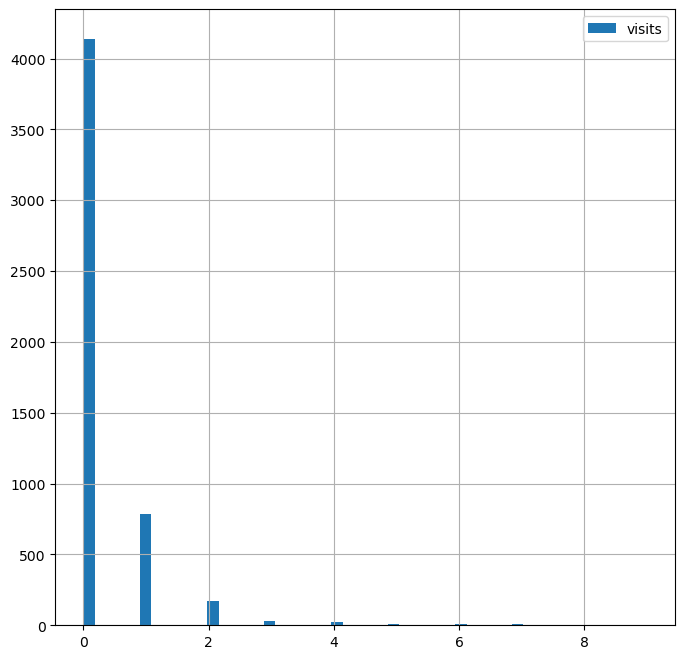

In [44]:
# Plot for DV (visits)

drv['visits'].hist(bins=50,legend=True,figsize=(8,8));

    # > 4,000 respondents did *not* visit the doctor at all during the 
    # two-week period

    # soooooo the dataset has a zero-inflated count problem aka 
    # the data displays *overdispersion* because of the excess zeros 

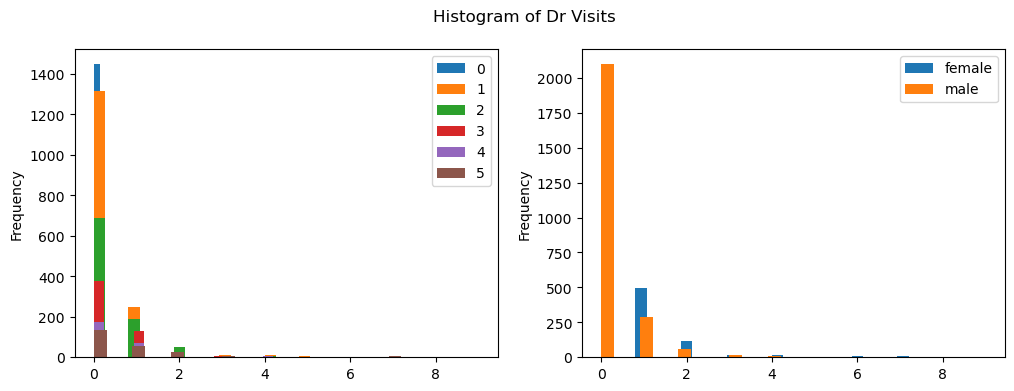

In [45]:
# variables of illness & gender

fig, axs = plt.subplots(1,2,figsize =(12,4))

for i,v in enumerate(['illness','gender']):
    ax = axs[i]                                                             # need this to be axs[i,j] for more plots
    drv.groupby(v)['visits'].plot(kind='hist',bins=30,legend=True, ax=ax)
                 
plt.suptitle('Histogram of Dr Visits');

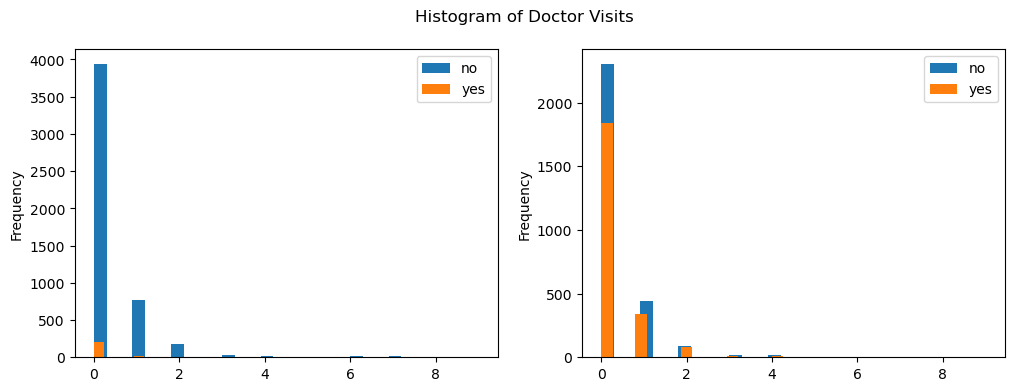

In [48]:
# variables of insurance for poor & private insurance 

fig, axs = plt.subplots(1,2,figsize =(12,4))

for i,v in enumerate(['freepoor','private']):
    ax = axs[i]
    drv.groupby(v)['visits'].plot(kind='hist',bins=30,legend=True, ax=ax)
                 
plt.suptitle('Histogram of Doctor Visits');

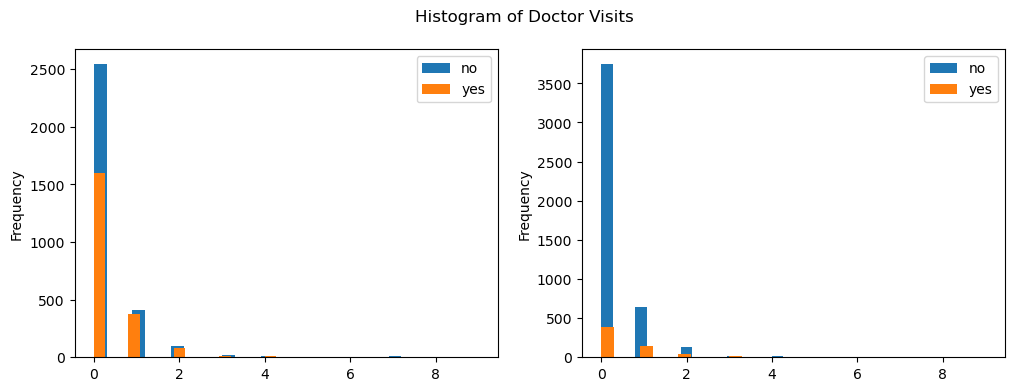

In [50]:
# variables of chronic illness

fig, axs = plt.subplots(1,2,figsize =(12,4))

for i,v in enumerate(['nchronic','lchronic']):
    ax = axs[i]
    drv.groupby(v)['visits'].plot(kind='hist',bins=30,legend=True, ax=ax)
                 
plt.suptitle('Histogram of Doctor Visits');

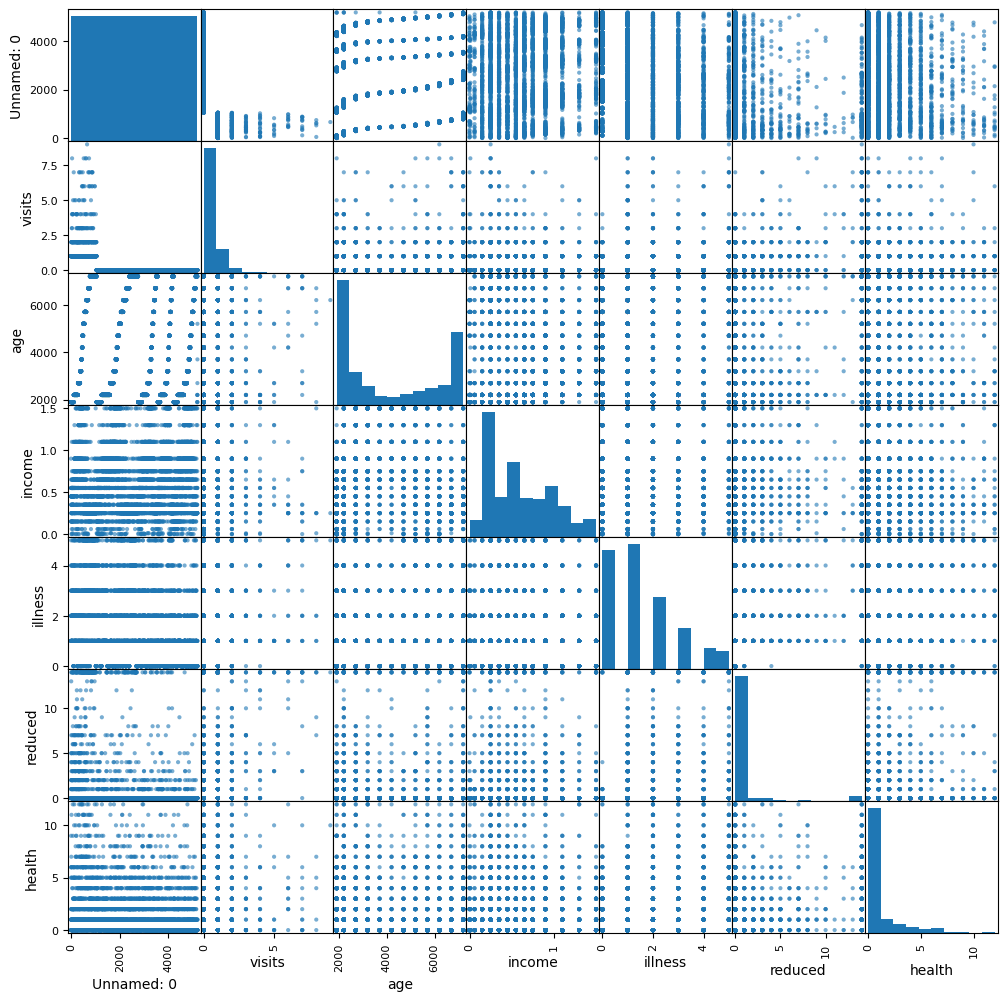

In [51]:
# Looksies w scatterplot analysis - kind of like the matrix thing 

pd.plotting.scatter_matrix(drv, alpha=0.6,
                    diagonal ='hist',figsize=(12,12));

### Part 3: Estimate as many a count model as you find it relevant, using statsmodels (with and without formula procedure)

In [53]:
# The formula needed to run the count model 

formula = 'visits ~ C(gender) + C(private) + C(freepoor) + C(freerepat) + C(nchronic) + C(lchronic)'
formula += '+ age + income + illness + health + reduced'

In [54]:
# Running a Posion regression model

pois_model = smf.poisson(formula,data=drv).fit()
print(pois_model.summary())

    # Looking at the significance of coefficnets,
    # all coefficents are significant 
    # except for the variable (freerepat) which estimates the effect of
    # free gov. health insurance due to old age/disability/vet status
    # on dr visits.

Optimization terminated successfully.
         Current function value: 0.646599
         Iterations 12
                          Poisson Regression Results                          
Dep. Variable:                 visits   No. Observations:                 5190
Model:                        Poisson   Df Residuals:                     5178
Method:                           MLE   Df Model:                           11
Date:                Mon, 16 Oct 2023   Pseudo R-squ.:                  0.1575
Time:                        11:30:02   Log-Likelihood:                -3355.9
converged:                       True   LL-Null:                       -3983.2
Covariance Type:            nonrobust   LLR p-value:                2.636e-262
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -1.9413      0.101    -19.223      0.000      -2.139      -1.743
C

In [55]:
# lookie at the summary of the model -

summary_col(pois_model,stars=True)

,visits
Intercept,-1.9413***
,(0.1010)
C(gender)[T.male],-0.1565***
,(0.0561)
C(private)[T.yes],0.1265*
,(0.0716)
C(freepoor)[T.yes],-0.4385**
,(0.1798)
C(freerepat)[T.yes],0.0836
,(0.0921)


In [56]:
# Look at marginal effects

print(pois_model.get_margeff().summary())

       Poisson Marginal Effects      
Dep. Variable:                 visits
Method:                          dydx
At:                           overall
                         dy/dx    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
C(gender)[T.male]      -0.0472      0.017     -2.781      0.005      -0.081      -0.014
C(private)[T.yes]       0.0382      0.022      1.766      0.077      -0.004       0.081
C(freepoor)[T.yes]     -0.1323      0.054     -2.434      0.015      -0.239      -0.026
C(freerepat)[T.yes]     0.0252      0.028      0.908      0.364      -0.029       0.080
C(nchronic)[T.yes]      0.0354      0.020      1.761      0.078      -0.004       0.075
C(lchronic)[T.yes]      0.0455      0.025      1.830      0.067      -0.003       0.094
age                  8.422e-06   5.01e-06      1.680      0.093    -1.4e-06    1.82e-05
income                 -0.0565      0.026     -2.189    

In [57]:
# Probability of the # of dr visits for each observation 

count_pred = pois_model.predict()
drv['pcount'] = pd.DataFrame({'pcount': count_pred})

# looking at the first 10 to verify

drv.head(10)

,Unnamed: 0,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic,pcount
0,1,1,female,1900.0,0.55,1,4,1,yes,no,no,no,no,0.319411
1,2,1,female,1900.0,0.45,1,2,1,yes,no,no,no,no,0.252608
2,3,1,male,1900.0,0.90,3,0,0,no,no,no,no,no,0.191093
3,4,1,male,1900.0,0.15,1,0,0,no,no,no,no,no,0.151565
4,5,1,male,1900.0,0.45,2,5,1,no,no,no,yes,no,0.377050
5,6,1,female,1900.0,0.35,5,1,9,no,no,no,yes,no,0.604731
6,7,1,female,1900.0,0.55,4,0,2,no,no,no,no,no,0.305629
7,8,1,female,1900.0,0.15,3,0,6,no,no,no,no,no,0.309177
8,9,1,female,1900.0,0.65,2,0,5,yes,no,no,no,no,0.257203
9,10,1,male,1900.0,0.15,1,0,0,yes,no,no,no,no,0.172003


In [58]:
# Checking w another description analysis

drv.describe()

,Unnamed: 0,visits,age,income,illness,reduced,health,pcount
count,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000
mean,2595.500000,0.301734,4063.853565,0.583160,1.431985,0.861850,1.217534,0.301734
std,1498.368279,0.798134,2047.818167,0.368907,1.384152,2.887628,2.124266,0.393628
min,1.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.073136
25%,1298.250000,0.000000,2200.000000,0.250000,0.000000,0.000000,0.000000,0.152350
50%,2595.500000,0.000000,3200.000000,0.550000,1.000000,0.000000,0.000000,0.201956
75%,3892.750000,0.000000,6200.000000,0.900000,2.000000,0.000000,2.000000,0.289775
max,5190.000000,9.000000,7200.000000,1.500000,5.000000,14.000000,12.000000,4.351827


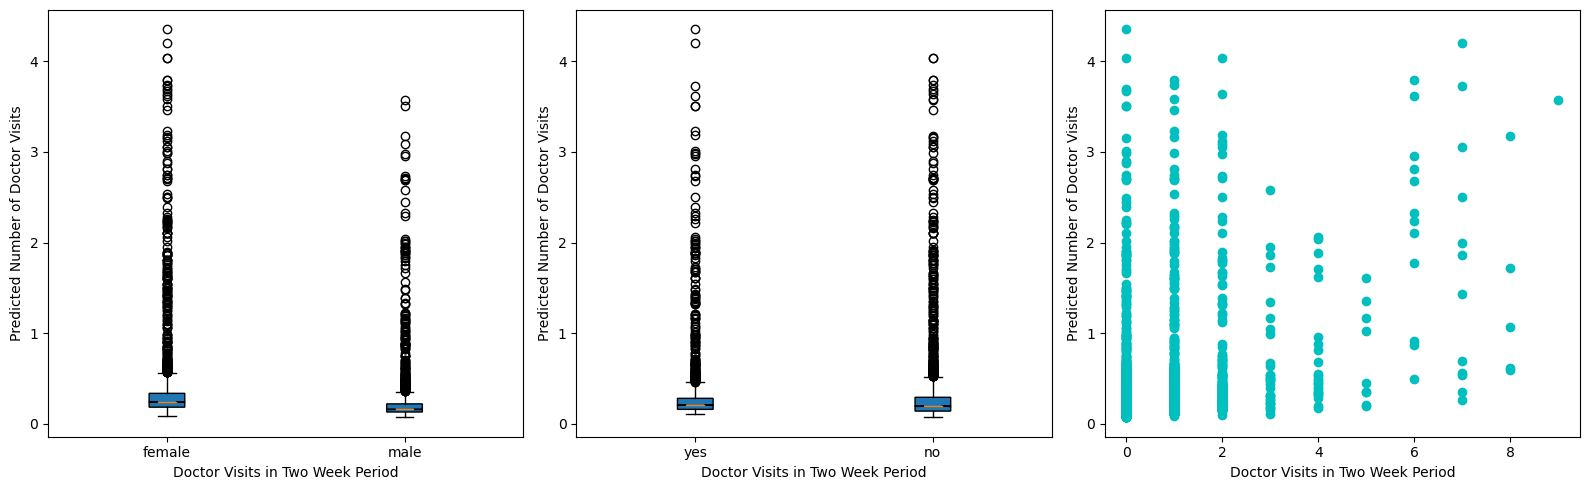

In [65]:
# Running some plots - my brief interpretation follows up afterwards! 

fig, axs = plt.subplots(nrows=1,ncols=3,figsize=(16,5))

axs[0].boxplot(
    [drv.loc[drv['gender']=='female',:]['pcount'],
             drv.loc[drv['gender']=='male',:]['pcount']],
            labels = ['female','male'],
              patch_artist = True,
               notch=True
    )

axs[1].boxplot(
    [drv.loc[drv['private']=='yes',:]['pcount'],
             drv.loc[drv['private']=='no',:]['pcount']],
            labels = ['yes','no'],
              patch_artist = True,
               notch=True
    )

axs[2].scatter(x=drv['visits'],y=drv['pcount'],color= 'c')

for ax in axs:
    ax.set_xlabel("Doctor Visits in Two Week Period")
    ax.set_ylabel("Predicted Number of Doctor Visits")

plt.tight_layout()
plt.show()

Based on my interpretations of the scatter plots, I find that:
-> women were more likely to see their dr compared to men during this time 
-> private health care insurance didn't seem to effect the # of times someone
    saw their dr 
-> IF respondents went to the dr, it was only 1 or 2 within the 2 weeks 
-> BUT most respondents didn't go in general

In [67]:
# Running a negative binomial regression & fitting it to the model 
# I keep getting a big error but not sure exactly why 

nb_model = smf.negativebinomial(formula,data=drv).fit()
print(nb_model.summary())

         Current function value: 0.618411
         Iterations: 0
         Function evaluations: 15
         Gradient evaluations: 3
                     NegativeBinomial Regression Results                      
Dep. Variable:                 visits   No. Observations:                 5190
Model:               NegativeBinomial   Df Residuals:                     5178
Method:                           MLE   Df Model:                           11
Date:                Mon, 16 Oct 2023   Pseudo R-squ.:                  0.1050
Time:                        11:39:43   Log-Likelihood:                -3209.6
converged:                      False   LL-Null:                       -3586.0
Covariance Type:            nonrobust   LLR p-value:                2.468e-154
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -1.9413      0.122    -15.874      0.

/Users/christine/ENTER/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:3661: RuntimeWarning: overflow encountered in exp
  return np.exp(linpred)
/Users/christine/ENTER/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:3377: RuntimeWarning: divide by zero encountered in log
  llf = coeff + size*np.log(prob) + endog*np.log(1-prob)
/Users/christine/ENTER/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:3468: RuntimeWarning: invalid value encountered in multiply
  dparams = exog*a1 * (y-mu)/(mu+a1)
/Users/christine/ENTER/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:3468: RuntimeWarning: invalid value encountered in divide
  dparams = exog*a1 * (y-mu)/(mu+a1)
/Users/christine/ENTER/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:3471: RuntimeWarning: invalid value encountered in divide
  - np.log(a1+mu) - (y-mu)/(a1+mu)).sum() * da1
/Users/christine/ENTER/lib/python3.10/site-packages/statsmo

Knowing that this data set has an issue of overdispersion due to the amount of zeros, I try to run a negative binomial regression to check my assumption of overdispersion. I get errors in the code but based on the tables, I see the parameter of the model is statistically significant which confirms my theory of overdispersion and suggests that I can't run a poisson. 

In [68]:
# summary of the marginal effects w the negative binomial regression

print(nb_model.get_margeff().summary())

  NegativeBinomial Marginal Effects  
Dep. Variable:                 visits
Method:                          dydx
At:                           overall
                         dy/dx    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
C(gender)[T.male]      -0.0472      0.021     -2.229      0.026      -0.089      -0.006
C(private)[T.yes]       0.0382      0.026      1.472      0.141      -0.013       0.089
C(freepoor)[T.yes]     -0.1323      0.062     -2.140      0.032      -0.253      -0.011
C(freerepat)[T.yes]     0.0252      0.036      0.707      0.480      -0.045       0.095
C(nchronic)[T.yes]      0.0354      0.024      1.481      0.139      -0.011       0.082
C(lchronic)[T.yes]      0.0455      0.032      1.430      0.153      -0.017       0.108
age                  8.422e-06   6.38e-06      1.320      0.187   -4.08e-06    2.09e-05
income                 -0.0565      0.031     -1.801    

In [69]:
# Trend doesn't change from the poisson to the negative binomial model
print(summary_col([pois_model,nb_model],
                  model_names =['Poisson','NegativeBinomial'],
                 stars = True,float_format = '%.3f'))


                     Poisson  NegativeBinomial
----------------------------------------------
C(freepoor)[T.yes]  -0.438**  -0.438**        
                    (0.180)   (0.204)         
C(freerepat)[T.yes] 0.084     0.084           
                    (0.092)   (0.118)         
C(gender)[T.male]   -0.156*** -0.156**        
                    (0.056)   (0.070)         
C(lchronic)[T.yes]  0.151*    0.151           
                    (0.082)   (0.105)         
C(nchronic)[T.yes]  0.117*    0.117           
                    (0.067)   (0.079)         
C(private)[T.yes]   0.126*    0.126           
                    (0.072)   (0.086)         
Intercept           -1.941*** -1.941***       
                    (0.101)   (0.122)         
age                 0.000*    0.000           
                    (0.000)   (0.000)         
alpha                         1.314***        
                              (0.130)         
health              0.031***  0.031**         
            

In [71]:
# Exogenous variables

exog = dmatrix('C(gender) + C(private) + C(freepoor) + C(freerepat) + C(nchronic) + C(lchronic) + age + I(age**2) + income + illness + health + reduced -1', data = drv,
              return_type = 'dataframe')
exog

,C(gender)[female],C(gender)[male],C(private)[T.yes],C(freepoor)[T.yes],C(freerepat)[T.yes],C(nchronic)[T.yes],C(lchronic)[T.yes],age,I(age ** 2),income,illness,health,reduced
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1900.0,3610000.0,0.55,1.0,1.0,4.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1900.0,3610000.0,0.45,1.0,1.0,2.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1900.0,3610000.0,0.90,3.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1900.0,3610000.0,0.15,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1900.0,3610000.0,0.45,2.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5185,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2200.0,4840000.0,0.55,0.0,0.0,0.0
5186,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2700.0,7290000.0,1.30,0.0,1.0,0.0
5187,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3700.0,13690000.0,0.25,1.0,1.0,0.0
5188,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5200.0,27040000.0,0.65,0.0,0.0,0.0


In [72]:
endog = drv['visits']

In [75]:
# Posion without the formula I made 

pois_model2 = sm.Poisson(exog=exog, endog=endog).fit()

Optimization terminated successfully.
         Current function value: 0.646540
         Iterations 7


In [74]:
print(pois_model2.summary())

                          Poisson Regression Results                          
Dep. Variable:                 visits   No. Observations:                 5190
Model:                        Poisson   Df Residuals:                     5177
Method:                           MLE   Df Model:                           12
Date:                Mon, 16 Oct 2023   Pseudo R-squ.:                  0.1576
Time:                        12:36:53   Log-Likelihood:                -3355.5
converged:                       True   LL-Null:                       -3983.2
Covariance Type:            nonrobust   LLR p-value:                2.122e-261
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
C(gender)[female]      -2.0670      0.189    -10.930      0.000      -2.438      -1.696
C(gender)[male]        -2.2238      0.190    -11.716      0.000      -2.596      -1.852
C(private)[T.yes

In [76]:
# poisson without formula marginal effects

print(pois_model2.get_margeff().summary())

       Poisson Marginal Effects      
Dep. Variable:                 visits
Method:                          dydx
At:                           overall
                         dy/dx    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
C(gender)[female]      -0.6237      0.057    -10.916      0.000      -0.736      -0.512
C(gender)[male]        -0.6710      0.058    -11.664      0.000      -0.784      -0.558
C(private)[T.yes]       0.0372      0.022      1.718      0.086      -0.005       0.080
C(freepoor)[T.yes]     -0.1328      0.054     -2.443      0.015      -0.239      -0.026
C(freerepat)[T.yes]     0.0241      0.028      0.867      0.386      -0.030       0.079
C(nchronic)[T.yes]      0.0344      0.020      1.710      0.087      -0.005       0.074
C(lchronic)[T.yes]      0.0426      0.025      1.696      0.090      -0.007       0.092
age                  3.187e-05   3.02e-05      1.055    

Looking at these models that don't include the formula, I know that the generalized poisson model won't run since the *data is zero-inflated*

In [78]:


gpois_model = sm.GeneralizedPoisson(exog=exog, endog=endog).fit_regularized(method='l1')
print(gpois_model.summary())

Inequality constraints incompatible    (Exit mode 4)
            Current function value: nan
            Iterations: 1
            Function evaluations: 1
            Gradient evaluations: 1
                    GeneralizedPoisson Regression Results                     
Dep. Variable:                 visits   No. Observations:                 5190
Model:             GeneralizedPoisson   Df Residuals:                     5177
Method:                           MLE   Df Model:                           12
Date:                Mon, 16 Oct 2023   Pseudo R-squ.:                     nan
Time:                        12:39:55   Log-Likelihood:                    nan
converged:                      False   LL-Null:                       -3576.0
Covariance Type:            nonrobust   LLR p-value:                       nan
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
C

/Users/christine/ENTER/lib/python3.10/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/christine/ENTER/lib/python3.10/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/christine/ENTER/lib/python3.10/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/christine/ENTER/lib/python3.10/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/christine/ENTER/lib/python3.10/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/christine/ENTER/lib/python3.10/site-packages/numpy/co

In [79]:
# Check out the exog variables
exog.columns

Index(['C(gender)[female]', 'C(gender)[male]', 'C(private)[T.yes]',
       'C(freepoor)[T.yes]', 'C(freerepat)[T.yes]', 'C(nchronic)[T.yes]',
       'C(lchronic)[T.yes]', 'age', 'I(age ** 2)', 'income', 'illness',
       'health', 'reduced'],
      dtype='object')

In [80]:
# I chose to consider men as being the inflation/inflated variable because
# prior knowledge suggests that men are less likely to go to the 
# doctor than women

zip_model = sm.ZeroInflatedPoisson(exog=exog, endog=endog, 
                                   exog_infl=exog[['C(gender)[male]']] 
                                   ).fit_regularized()
print(zip_model.summary())

Inequality constraints incompatible    (Exit mode 4)
            Current function value: inf
            Iterations: 1
            Function evaluations: 1
            Gradient evaluations: 1
                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:                  visits   No. Observations:                 5190
Model:             ZeroInflatedPoisson   Df Residuals:                     5177
Method:                            MLE   Df Model:                           12
Date:                 Mon, 16 Oct 2023   Pseudo R-squ.:                    -inf
Time:                         12:47:44   Log-Likelihood:                   -inf
converged:                       False   LL-Null:                       -3714.2
Covariance Type:             nonrobust   LLR p-value:                     1.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------

/Users/christine/ENTER/lib/python3.10/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/christine/ENTER/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:1478: RuntimeWarning: overflow encountered in exp
  L = np.exp(np.dot(X,params) + offset + exposure)
/Users/christine/ENTER/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:1567: RuntimeWarning: overflow encountered in exp
  L = np.exp(np.dot(X,params) + exposure + offset)
/Users/christine/ENTER/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:1568: RuntimeWarning: invalid value encountered in multiply
  return -np.dot(L*X.T, X)
/Users/christine/ENTER/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/christine

### Part 4:  Run as many a post-estimation diagnostic test as you find it relevant

In [81]:
for a in dir(pois_model):
    if not a.startswith('_'):
        print(a)

aic
bic
bse
conf_int
converged
cov_kwds
cov_params
cov_type
df_model
df_resid
f_test
fittedvalues
get_diagnostic
get_distribution
get_influence
get_margeff
get_prediction
im_ratio
info_criteria
initialize
k_constant
llf
llnull
llr
llr_pvalue
load
method
mle_retvals
mle_settings
model
nobs
normalized_cov_params
params
predict
predict_prob
prsquared
pvalues
remove_data
resid
resid_pearson
resid_response
save
scale
score_test
set_null_options
summary
summary2
t_test
t_test_pairwise
tvalues
use_t
wald_test
wald_test_terms


In [82]:
resid = pois_model.resid_pearson
yhat = pois_model.fittedvalues

In [ ]:
# Pulling the deviance 

def calculate_dev(y_true,y_pred):
    return (2 * (y_true * np.log(y_true/y_pred) + (y_pred - y_true))).sum()

D = calculate_dev(endog, yhat)
D

    # Deviance statistic is higher than the chi-squared distribution table 
    # soooo I reject that there is a lack of statistically significant
    # but there doesn't seem to be proof that the model lacks fit 

In [ ]:
# Pulling pearson 

def calculate_pearson(y_true,y_pred):
    return ((y_true - y_pred)/y_pred).sum()

P = calculate_pearson(endog, yhat)
P

    # Pearson statistic is higher than the  chi-squared distribution table
    # again, i can rejcect that there's lack of statistical significance and 
    # that the model lacks fit 

### Step 5: Compare in a meaningful way the performances of all the models that you developed.

In [83]:
# Pull summary of both the neg binomial & Poisson to compare models

print(summary_col([pois_model,nb_model],
                  model_names =['Poisson','NegativeBinomial'],
                 stars = True,float_format = '%.3f'))

    # statistical significances in freepoor, men, illness, reduced


                     Poisson  NegativeBinomial
----------------------------------------------
C(freepoor)[T.yes]  -0.438**  -0.438**        
                    (0.180)   (0.204)         
C(freerepat)[T.yes] 0.084     0.084           
                    (0.092)   (0.118)         
C(gender)[T.male]   -0.156*** -0.156**        
                    (0.056)   (0.070)         
C(lchronic)[T.yes]  0.151*    0.151           
                    (0.082)   (0.105)         
C(nchronic)[T.yes]  0.117*    0.117           
                    (0.067)   (0.079)         
C(private)[T.yes]   0.126*    0.126           
                    (0.072)   (0.086)         
Intercept           -1.941*** -1.941***       
                    (0.101)   (0.122)         
age                 0.000*    0.000           
                    (0.000)   (0.000)         
alpha                         1.314***        
                              (0.130)         
health              0.031***  0.031**         
            

Reviewing the comparison of the two models, there seems to be inconsistent significance across the model with a loss specifically in the negative binomial model. 

-> Significant negative correlation between respondents with free government health insurance and doctor visits- aka respondents with gov health insurance are less likely to see dr compared to those without it 


-> Gender difference: male respondents were less likely to see doctors than their female counterparts *maybe because men are less likely to seek medical help? 

-> Chronic conditions: respondents with chronic conditions that limit activity are more likely to visit dr *makes sense since they might need more medical help

-> Respondents with high scores on the health questionnaire are more likely to visit dr *makes sense as high scores suggest they are not as healthy as those with lower scores

-> If respondents were sick during the two weeks, they were more likely to see a dr 

-> If respondents had to decrease activity during the 2 weeks because of a health reason (injury/sickness), then they were more likely to see a doctor than those who didn't have their activity affected